# Starbucks Capstone Challenge:Using Starbucks App user Data to analyse successful offer's
### Project Overview
Customers satisfaction drives business and effective data analysis provides the insights of customers behavior .

The Starbucks Udacity Data Scientist Nanodegree Capstone challenge data set is a simulation of customer behavior on the Starbucks rewards mobile application. Periodically, Starbucks sends offers to users that may be an advertisement, discount, or buy one get one free (BOGO). An important characteristic regarding this dataset is that not all users receive the same offer and there is variety among these 3 offers.

The data set is divided in three files.The first file(portfolio.json) contains offer ids and meta data about each offer.The second file(profile.json) contains demographic data of each customer. The last one(transcript.json) contains records for transactions, offers received, offers viewed, and offers completed.

An offer is only successful when a customer both views an offer and completes it within the given period of time.

### Project Statement
In my capstone project, I aim to answer the following business problems:
    1. What should be the target age_range of the customers.
    2. Which offer to provide to a customer of a particular 'age group'.
    3. Can we determine a channel/medium through which an offer shuld be sent to make it a 
    successful one, given the demographic features of a customer. 
            

To answer the above stated problems, I will do some EDA of the three datasets given, to familarize with the data. Then, I will preprocess each of the dataset to make them usable. When done with the preprocessing step, will combine the dataset .
I will then use the different statistical techniques to analyze the data to find the relevant solutions to the problems I chose to answer. Will use some plots to get better insights from the data.



## 1. Import libraries and load datasets.

In [1]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transaction = pd.read_json('data/transcript.json', orient='records', lines=True)

## Data Exploration.


### 1. Offer Portfolio data

In [2]:
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [3]:
#check for null values
portfolio.isnull().sum()

channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64

In [4]:
# Number of unique ids
len(portfolio.id.unique())

10

### 2. Profile data

In [5]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [6]:
profile.shape

(17000, 5)

In [7]:
#check for null values
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [8]:
# number of unique id's
len(profile["id"].unique())

17000

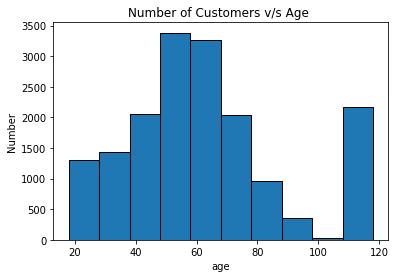

In [9]:
## Age distribution 
plt.hist(profile["age"] , ec = "black")
plt.xlabel("age")
plt.ylabel("Number")
plt.title('Number of Customers v/s Age ')
plt.show()

In [10]:
# Checking for age == 118
profile[profile["age"] == 118].isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

Since all the entries with age=118, have null values for gender and income, thus we can drop them during preprocessing step.

## 3. Transaction Dataset

In [11]:
transaction.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [12]:
transaction.shape

(306534, 4)

In [13]:
# Unique persons in transcript dataset
len(transaction["person"].unique())

17000

Seems like we have the exact same person in transcript dataset and profile dataset, but needs to map accordingly.

In [14]:
# Check for null values
transaction.isnull().sum()

event     0
person    0
time      0
value     0
dtype: int64

In [15]:
transaction["event"].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'], dtype=object)

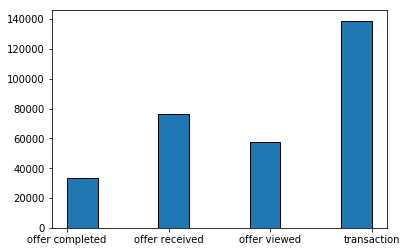

In [16]:
plt.hist(transaction["event"] , ec="black")
plt.show()

## Data Preprocessing.

### Clean "Offer Portfolio Dataset".

1. Suitably rename the columns.
2. One Hot Encode 'offertype' and 'channels' column.
3. Replace the 'offertype' and 'channels' columns with their respective one hot encoded values

In [17]:
def update_col_name(dataframe, old_column_name, new_column_name):
    '''
    Updates a dataframe's columns with new names
    
    Input:
    dataframe = Dataframe to be updated
    old_column = column which has to be updated
    new_column = New column name 
    
    Output:
    Dataframe: Updated data frame
    '''
    
    column_names = dataframe.columns.values
    index = np.where(column_names == old_column_name)[0]
    column_names[index] = new_column_name
    dataframe.columns = column_names
    
    return dataframe

In [18]:
# Renaming the columns 
portfolio = update_col_name(portfolio,"id", "offer_id" )
portfolio = update_col_name(portfolio, "duration", "duration_in_days")
portfolio.head()

,channels,difficulty,duration_in_days,offer_id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [19]:
# One Hot Encode 'Offer_type' variable
offer_type_dummy = pd.get_dummies(portfolio["offer_type"])
offer_type_dummy

,bogo,discount,informational
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,0,1
8,1,0,0
9,0,1,0


In [20]:
# Using multilabel-binarizer for 'channels' column 
mlb = MultiLabelBinarizer()
mlb.fit(portfolio["channels"])
channels_df = pd.DataFrame(mlb.transform(portfolio["channels"]), columns = mlb.classes_)
channels_df

,email,mobile,social,web
0,1,1,1,0
1,1,1,1,1
2,1,1,0,1
3,1,1,0,1
4,1,0,0,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,0
8,1,1,1,1
9,1,1,0,1


In [21]:
# Concatenate the above formed dataframes with portfolio dataframe
portfolio = pd.concat([portfolio, offer_type_dummy, channels_df], axis=1)
portfolio = portfolio.drop(columns = ["channels" , "offer_type"])
portfolio

,difficulty,duration_in_days,offer_id,reward,bogo,discount,informational,email,mobile,social,web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,10,1,0,0,1,1,1,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,10,1,0,0,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,0,0,0,1,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,0,0,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,0,1,0,1,0,0,1
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,3,0,1,0,1,1,1,1
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,2,0,1,0,1,1,1,1
7,0,3,5a8bc65990b245e5a138643cd4eb9837,0,0,0,1,1,1,1,0
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,5,1,0,0,1,1,1,1
9,10,7,2906b810c7d4411798c6938adc9daaa5,2,0,1,0,1,1,0,1


## Clean "Profile" Dataset

1. Rename the column "id" to "customer_id"
2. Remove customers with missing gender and income data
3. Transform the 'became_member_on' column to a datetime object
4. One hot encode a customer's membership start year
5. Label encode 'gender'
6. One Hot Encode 'age'

In [22]:
# Updating the "id" column
profile = update_col_name(profile, "id", "customer_id")
profile.head()

,age,became_member_on,gender,customer_id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [23]:
# Droping the rows with null values
profile = profile.dropna(how = "any")

In [24]:
## Check the gender column
profile["gender"].value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

In [25]:
# Droping the rows with genderf = "O"
profile = profile[profile["gender"] != 'O']
profile["gender"].value_counts()

M    8484
F    6129
Name: gender, dtype: int64

In [26]:
profile = profile.reset_index(drop = True)

In [27]:
# One hot encode a customer's membership start year
profile["became_member_on"] = pd.to_datetime(profile["became_member_on"] , format = '%Y%m%d')
profile["year"] = profile["became_member_on"].dt.year
year_profile = pd.get_dummies(profile["year"])
year_profile.head()

,2013,2014,2015,2016,2017,2018
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,1,0


In [28]:
# One hot encode 'gender'
lbl = LabelBinarizer()
lbl.fit(profile["gender"])
gender_df = pd.DataFrame(lbl.transform(profile["gender"]) , columns = ["gender_dummy"])

In [29]:
gender_df.head()

,gender_dummy
0,0
1,0
2,1
3,1
4,1


In [30]:
# Mapping of customer gender to int 
gender_integer_map = {}
for elem in lbl.classes_:
    gender_integer_map[elem] = lbl.transform([elem])[0,0]
gender_integer_map

{'F': 0, 'M': 1}

In [31]:
# Encode the age in a range
min_age_limit = np.int(np.floor(np.min(profile['age'])/10)*10)
max_age_limit = np.int(np.ceil(np.max(profile['age']/10))*10)

profile['age_range'] = pd.cut(profile['age'],(range(min_age_limit,max_age_limit + 10, 10)), right=False)
profile['age_range'] = profile['age_range'].astype('str')

age_range_df = pd.get_dummies(profile['age_range'])
age_range_df.head()

,"[10, 20)","[100, 110)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)"
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0


In [32]:
profile.drop(["year" ,"gender","became_member_on", "age"], axis = 1)
profile = profile[["customer_id", "income"]]

In [33]:
# Concatenate profile, year_profile and gender_df dataframe
profile = pd.concat([profile, year_profile, gender_df, age_range_df] , axis = 1)

In [34]:
profile.head()

,customer_id,income,2013,2014,2015,2016,2017,2018,gender_dummy,"[10, 20)","[100, 110)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)"
0,0610b486422d4921ae7d2bf64640c50b,112000.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,78afa995795e4d85b5d9ceeca43f5fef,100000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,70000.0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
3,389bc3fa690240e798340f5a15918d5c,53000.0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
4,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0


### Analyzing Membership Start Year

In [35]:
df = profile.groupby([2013,2014,2015,2016,2017,2018])

In [36]:
df_sum = df.sum()
df_sum

income  gender_dummy  [10, 20)  \
2013 2014 2015 2016 2017 2018                                        
0    0    0    0    0    1     223712000.0          2312      55.0   
                    1    0     362194000.0          3067      76.0   
               1    0    0     211236000.0          1483      33.0   
          1    0    0    0     105177000.0           905      25.0   
     1    0    0    0    0      38296000.0           520      11.0   
1    0    0    0    0    0      15597000.0           197       5.0   

                               [100, 110)  [20, 30)  [30, 40)  [40, 50)  \
2013 2014 2015 2016 2017 2018                                             
0    0    0    0    0    1            3.0     380.0     417.0     587.0   
                    1    0            9.0     530.0     580.0     852.0   
               1    0    0            0.0     191.0     249.0     416.0   
          1    0    0    0            4.0     134.0     150.0     250.0   
     1    0    0    0    0            0.0      86.0      77.0     114.0   
1    0    0    0    0    0            0.0      32.0      30.0      50.0   

                               [50, 60)  [60, 70)  [70, 80)  [80, 90)  \
2013 2014 2015 2016 2017 2018                                           
0    0    0    0    0    1        807.0     707.0     417.0     182.0   
                    1    0       1295.0    1101.0     669.0     300.0   
               1    0    0        794.0     665.0     378.0     201.0   
          1    0    0    0        391.0     302.0     193.0      98.0   
     1    0    0    0    0        150.0     121.0      64.0      29.0   
1    0    0    0    0    0         48.0      56.0      36.0      11.0   

                               [90, 100)  
2013 2014 2015 2016 2017 2018             
0    0    0    0    0    1          59.0  
                    1    0          98.0  
               1    0    0          65.0  
          1    0    0    0          21.0  
     1    0    0    0    0           6.0  
1    0    0    0    0    0           3.0

In [37]:
# Number of male customers taking membership yearwise  
male = df_sum["gender_dummy"].values           
male                                                   # Values in descending order by year

array([2312, 3067, 1483,  905,  520,  197])

In [38]:
df_count = df.count()
df_count

customer_id  income  gender_dummy  [10, 20)  \
2013 2014 2015 2016 2017 2018                                                
0    0    0    0    0    1            3614    3614          3614      3614   
                    1    0            5510    5510          5510      5510   
               1    0    0            2992    2992          2992      2992   
          1    0    0    0            1568    1568          1568      1568   
     1    0    0    0    0             658     658           658       658   
1    0    0    0    0    0             271     271           271       271   

                               [100, 110)  [20, 30)  [30, 40)  [40, 50)  \
2013 2014 2015 2016 2017 2018                                             
0    0    0    0    0    1           3614      3614      3614      3614   
                    1    0           5510      5510      5510      5510   
               1    0    0           2992      2992      2992      2992   
          1    0    0    0           1568      1568      1568      1568   
     1    0    0    0    0            658       658       658       658   
1    0    0    0    0    0            271       271       271       271   

                               [50, 60)  [60, 70)  [70, 80)  [80, 90)  \
2013 2014 2015 2016 2017 2018                                           
0    0    0    0    0    1         3614      3614      3614      3614   
                    1    0         5510      5510      5510      5510   
               1    0    0         2992      2992      2992      2992   
          1    0    0    0         1568      1568      1568      1568   
     1    0    0    0    0          658       658       658       658   
1    0    0    0    0    0          271       271       271       271   

                               [90, 100)  
2013 2014 2015 2016 2017 2018             
0    0    0    0    0    1          3614  
                    1    0          5510  
               1    0    0          2992  
          1    0    0    0          1568  
     1    0    0    0    0           658  
1    0    0    0    0    0           271

In [39]:
# Number of female customers taking membership yearwise  
female = df_count["gender_dummy"].values - male                 # female = Total - male
female = female[::-1]                                           # Inverting the array
female

array([  74,  138,  663, 1509, 2443, 1302])

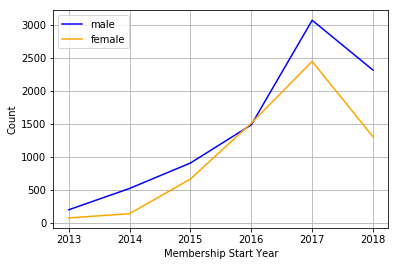

In [40]:
# Plot a line graph
startyear = [2013,2014,2015,2016,2017,2018]
plt.plot(startyear, male[::-1] , color = "blue", label = "male")
plt.plot(startyear, female, color = "orange" , label = "female")
plt.xlabel("Membership Start Year")
plt.ylabel("Count")
plt.grid(True)
plt.legend()
plt.show()

The results suggest that most customers recently joined the Starbucks rewards program. These results also suggest that there are 
more male customers than female customers.

## Clean "Transaction" Dataset

1. Rename the 'person' column to 'customerid'
2. Remove customer id's that are not in the customer profile DataFrame
3. Converting 'time' column to 'days_time' column
4. One hot encoder "event" column
5. Create a DataFrame that  
     - describes offers
     - describes customer transaction events
6. Drop duplicate entries

In [41]:
# Renaming the 'person' column
transaction = update_col_name(transaction, "person", "customer_id")

In [42]:
transaction.head()

,event,customer_id,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [43]:
# Remove customer id's that are not in the customer profile DataFrame
select_data = transaction['customer_id'].isin(profile['customer_id'])
transaction = transaction[select_data]
transaction.shape

(268791, 4)

In [44]:
len(transaction["customer_id"].unique())

14613

In [45]:
# Converting 'time' column to 'days_time'
transaction["days_time"] = transaction["time"] / 24

In [46]:
transaction = pd.concat([transaction, transaction['value'].apply(pd.Series)], axis=1)

In [47]:
# Dataframe with (event == "offer completed") 
offer_comp = transaction[transaction["event"] == "offer completed"][["offer_id","event","customer_id","days_time"]]
offer_comp.head()

,offer_id,event,customer_id,days_time
12658,2906b810c7d4411798c6938adc9daaa5,offer completed,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0.0
12672,fafdcd668e3743c1bb461111dcafc2a4,offer completed,fe97aa22dd3e48c8b143116a8403dd52,0.0
12679,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer completed,629fc02d56414d91bca360decdfa9288,0.0
12692,ae264e3637204a6fb9bb56bc8210ddfd,offer completed,676506bad68e4161b9bbaffeb039626b,0.0
12697,4d5c57ea9a6940dd891ad53e9dbe8da0,offer completed,8f7dd3b2afe14c078eb4f6e6fe4ba97d,0.0


In [48]:
# Dataframe with (event == "offer received" or "offer viewed")
offer_view_rec = transaction[transaction["event"].isin(["offer received", "offer viewed"])][["offer id","event","customer_id","days_time"]]
offer_view_rec = update_col_name(offer_view_rec , "offer id", "offer_id")
offer_view_rec.head()

,offer_id,event,customer_id,days_time
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.0
2,2906b810c7d4411798c6938adc9daaa5,offer received,e2127556f4f64592b11af22de27a7932,0.0
5,f19421c1d4aa40978ebb69ca19b0e20d,offer received,389bc3fa690240e798340f5a15918d5c,0.0
7,3f207df678b143eea3cee63160fa8bed,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0.0
8,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,aa4862eba776480b8bb9c68455b8c2e1,0.0


In [49]:
# Concatenate the two above made dataset
offer_data = pd.concat([offer_view_rec, offer_comp])
offer_data = offer_data.reset_index(drop = True)
offer_data.head()

,offer_id,event,customer_id,days_time
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.0
1,2906b810c7d4411798c6938adc9daaa5,offer received,e2127556f4f64592b11af22de27a7932,0.0
2,f19421c1d4aa40978ebb69ca19b0e20d,offer received,389bc3fa690240e798340f5a15918d5c,0.0
3,3f207df678b143eea3cee63160fa8bed,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0.0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,aa4862eba776480b8bb9c68455b8c2e1,0.0


In [50]:
# Creating dummies of 'event' column
event_df = pd.get_dummies(offer_data["event"])
event_df.rename(columns = {"offer completed":"completed","offer received":"received","offer viewed":"viewed"}, inplace = True)
event_df.head()

,completed,received,viewed
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [51]:
# Newly created dataset that describe offers
offer_data = pd.concat([offer_data, event_df], axis = 1)
offer_data = offer_data.drop("event", axis = 1)
offer_data.head()

,offer_id,customer_id,days_time,completed,received,viewed
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,0.0,0,1,0
1,2906b810c7d4411798c6938adc9daaa5,e2127556f4f64592b11af22de27a7932,0.0,0,1,0
2,f19421c1d4aa40978ebb69ca19b0e20d,389bc3fa690240e798340f5a15918d5c,0.0,0,1,0
3,3f207df678b143eea3cee63160fa8bed,2eeac8d8feae4a8cad5a6af0499a211d,0.0,0,1,0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,aa4862eba776480b8bb9c68455b8c2e1,0.0,0,1,0


In [52]:
# Check for duplicate entries
offer_data.duplicated().sum()

368

In [53]:
# Drop duplicate entries
offer_data = offer_data[offer_data.duplicated() == False]
offer_data.shape

(146247, 6)

In [54]:
# Dataset that describe customer transaction events
df_transaction = transaction[transaction["event"] == "transaction"][["customer_id", "amount","days_time"]] 
df_transaction = df_transaction.reset_index(drop = True)
df_transaction.head()

,customer_id,amount,days_time
0,02c083884c7d45b39cc68e1314fec56c,0.83,0.0
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,34.56,0.0
2,54890f68699049c2a04d415abc25e717,13.23,0.0
3,b2f1cd155b864803ad8334cdf13c4bd2,19.51,0.0
4,fe97aa22dd3e48c8b143116a8403dd52,18.97,0.0


In [55]:
df_transaction.duplicated().sum()

0

## Combining Data

1. Combine profile, portfolio and offer_data 
2. Combine profile and df_transaction dataset

In [56]:
# Combine profile and offer_data 
prof_offer_df = pd.merge(profile, offer_data ,on=["customer_id"])
prof_offer_df.head()

,customer_id,income,2013,2014,2015,2016,2017,2018,gender_dummy,"[10, 20)",...,"[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)",offer_id,days_time,completed,received,viewed
0,0610b486422d4921ae7d2bf64640c50b,112000.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,17.00,0,1,0
1,0610b486422d4921ae7d2bf64640c50b,112000.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,3f207df678b143eea3cee63160fa8bed,21.00,0,1,0
2,0610b486422d4921ae7d2bf64640c50b,112000.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,22.00,1,0,0
3,78afa995795e4d85b5d9ceeca43f5fef,100000.0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,0,1,0
4,78afa995795e4d85b5d9ceeca43f5fef,100000.0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.25,0,0,1


In [57]:
# Shuffling the columns in a particular order
column_order = ["customer_id","offer_id", "income","gender_dummy",2013,2014,2015,2016,2017,2018,
                "days_time","completed","received","viewed",'[10, 20)','[20, 30)','[30, 40)', '[40, 50)',
                '[50, 60)', '[60, 70)', '[70, 80)', '[80, 90)', '[90, 100)', '[100, 110)']
prof_offer_df = prof_offer_df[column_order]
prof_offer_df.head()

,customer_id,offer_id,income,gender_dummy,2013,2014,2015,2016,2017,2018,...,"[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)","[100, 110)"
0,0610b486422d4921ae7d2bf64640c50b,9b98b8c7a33c4b65b9aebfe6a799e6d9,112000.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0610b486422d4921ae7d2bf64640c50b,3f207df678b143eea3cee63160fa8bed,112000.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0610b486422d4921ae7d2bf64640c50b,9b98b8c7a33c4b65b9aebfe6a799e6d9,112000.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,100000.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,100000.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [58]:
# Combine portfolio and above formed dataset
order = ["customer_id","offer_id", "income","gender_dummy","difficulty","duration_in_days","bogo","discount","informational",2013,2014,2015,2016,2017,2018,
         "days_time","mobile","social","web","completed","received","viewed","reward",'[10, 20)', '[20, 30)', '[30, 40)', '[40, 50)',
        '[50, 60)', '[60, 70)', '[70, 80)', '[80, 90)','[90, 100)', '[100, 110)']
dataframe_offer = pd.merge(portfolio, prof_offer_df ,on = ["offer_id"])
dataframe_offer = dataframe_offer[order]
dataframe_offer.head()

,customer_id,offer_id,income,gender_dummy,difficulty,duration_in_days,bogo,discount,informational,2013,...,"[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)","[100, 110)"
0,78afa995795e4d85b5d9ceeca43f5fef,ae264e3637204a6fb9bb56bc8210ddfd,100000.0,0,10,7,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,78afa995795e4d85b5d9ceeca43f5fef,ae264e3637204a6fb9bb56bc8210ddfd,100000.0,0,10,7,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,78afa995795e4d85b5d9ceeca43f5fef,ae264e3637204a6fb9bb56bc8210ddfd,100000.0,0,10,7,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,aa4862eba776480b8bb9c68455b8c2e1,ae264e3637204a6fb9bb56bc8210ddfd,57000.0,0,10,7,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,aa4862eba776480b8bb9c68455b8c2e1,ae264e3637204a6fb9bb56bc8210ddfd,57000.0,0,10,7,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [59]:
# Combine profile and df_transaction dataset
order = ["customer_id", "income","gender_dummy",2013,2014,2015,2016,2017,2018,
         "days_time",'[10, 20)', '[20, 30)', '[30, 40)', '[40, 50)',
        '[50, 60)', '[60, 70)', '[70, 80)', '[80, 90)','[90, 100)', '[100, 110)', "amount"]
dataframe_transaction = pd.merge(profile, df_transaction, on = ["customer_id"])
dataframe_transaction = dataframe_transaction[order]
dataframe_transaction.head()

,customer_id,income,gender_dummy,2013,2014,2015,2016,2017,2018,days_time,...,"[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)","[100, 110)",amount
0,0610b486422d4921ae7d2bf64640c50b,112000.0,0,0,0,0,0,1,0,0.75,...,0,0,0,1,0,0,0,0,0,21.51
1,0610b486422d4921ae7d2bf64640c50b,112000.0,0,0,0,0,0,1,0,6.00,...,0,0,0,1,0,0,0,0,0,32.28
2,0610b486422d4921ae7d2bf64640c50b,112000.0,0,0,0,0,0,1,0,22.00,...,0,0,0,1,0,0,0,0,0,23.22
3,78afa995795e4d85b5d9ceeca43f5fef,100000.0,0,0,0,0,0,1,0,5.50,...,0,0,0,0,0,1,0,0,0,19.89
4,78afa995795e4d85b5d9ceeca43f5fef,100000.0,0,0,0,0,0,1,0,6.00,...,0,0,0,0,0,1,0,0,0,17.78


## Implementation : Insights From The Data

### Analysis of offer events vs age_range

In [60]:
group = dataframe_offer.groupby(['[10, 20)', '[20, 30)', '[30, 40)', '[40, 50)',
        '[50, 60)', '[60, 70)', '[70, 80)', '[80, 90)','[90, 100)', '[100, 110)'])
group_1 = group.sum()
group_1

income  \
[10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [60, 70) [70, 80) [80, 90) [90, 100) [100, 110)                 
0        0        0        0        0        0        0        0        0         1           1.268400e+07   
                                                                        1         0           1.804080e+08   
                                                               1        0         0           6.125340e+08   
                                                      1        0        0         0           1.267224e+09   
                                             1        0        0        0         0           2.126332e+09   
                                    1        0        0        0        0         0           2.548636e+09   
                           1        0        0        0        0        0         0           1.427456e+09   
                  1        0        0        0        0        0        0         0           7.943990e+08   
         1        0        0        0        0        0        0        0         0           6.500820e+08   
1        0        0        0        0        0        0        0        0         0           9.582300e+07   

                                                                                              gender_dummy  \
[10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [60, 70) [70, 80) [80, 90) [90, 100) [100, 110)                 
0        0        0        0        0        0        0        0        0         1                     20   
                                                                        1         0                    974   
                                                               1        0         0                   3753   
                                                      1        0        0         0                   9097   
                                             1        0        0        0         0                  16066   
                                    1        0        0        0        0         0                  19106   
                           1        0        0        0        0        0         0                  14013   
                  1        0        0        0        0        0        0         0                   9527   
         1        0        0        0        0        0        0        0         0                   8678   
1        0        0        0        0        0        0        0        0         0                   1455   

                                                                                              difficulty  \
[10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [60, 70) [70, 80) [80, 90) [90, 100) [100, 110)               
0        0        0        0        0        0        0        0        0         1                 1391   
                                                                        1         0                20216   
                                                               1        0         0                65867   
                                                      1        0        0         0               139223   
                                             1        0        0        0         0               238355   
                                    1        0        0        0        0         0               282102   
                           1        0        0        0        0        0         0               179213   
                  1        0        0        0        0        0        0         0               114151   
         1        0        0        0        0        0        0        0         0                98451   
1        0        0        0        0        0        0        0        0         0                13890   

                                                                                              duration_in_days  \
[10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [6

In [61]:
received = group_1["received"]
viewed = group_1["viewed"]
completed = group_1["completed"]

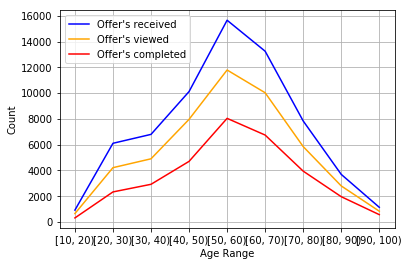

In [62]:
# Plot
age_range = ['[10, 20)','[20, 30)','[30, 40)','[40, 50)','[50, 60)','[60, 70)','[70, 80)', '[80, 90)','[90, 100)']
plt.plot(age_range, received[1:].values[::-1], color = "blue", label = "Offer's received")
plt.plot(age_range, viewed[1:].values[::-1], color = "orange" , label = "Offer's viewed")
plt.plot(age_range, completed[1:].values[::-1], color = "red" , label = "Offer's completed")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.grid(True)
plt.legend()
plt.show()

From the plot above, we can clearly see that customers of age_range [50,60) gets the highest number of offers and they are also the ones who completes the most number number of offers.

But, just by seeing the number of completed offers, we can't say that Starbucks should provide most offers to the age_group of [50,60) . We need more data points to zero down on a particular age_group

### Conversion rate of an offer by age_range and respective income

In [63]:
group_2 = group.mean()
group_2

income  \
[10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [60, 70) [70, 80) [80, 90) [90, 100) [100, 110)                 
0        0        0        0        0        0        0        0        0         1           75053.254438   
                                                                        1         0           70942.980731   
                                                               1        0         0           72480.653177   
                                                      1        0        0         0           71866.613736   
                                             1        0        0        0         0           70830.512991   
                                    1        0        0        0        0         0           71822.911089   
                           1        0        0        0        0        0         0           62651.685393   
                  1        0        0        0        0        0        0         0           54329.024757   
         1        0        0        0        0        0        0        0         0           51381.757825   
1        0        0        0        0        0        0        0        0         0           50753.707627   

                                                                                              gender_dummy  \
[10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [60, 70) [70, 80) [80, 90) [90, 100) [100, 110)                 
0        0        0        0        0        0        0        0        0         1               0.118343   
                                                                        1         0               0.383012   
                                                               1        0         0               0.444089   
                                                      1        0        0         0               0.515908   
                                             1        0        0        0         0               0.535177   
                                    1        0        0        0        0         0               0.538425   
                           1        0        0        0        0        0         0               0.615037   
                  1        0        0        0        0        0        0         0               0.651552   
         1        0        0        0        0        0        0        0         0               0.685899   
1        0        0        0        0        0        0        0        0         0               0.770657   

                                                                                              difficulty  \
[10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [60, 70) [70, 80) [80, 90) [90, 100) [100, 110)               
0        0        0        0        0        0        0        0        0         1             8.230769   
                                                                        1         0             7.949666   
                                                               1        0         0             7.793989   
                                                      1        0        0         0             7.895593   
                                             1        0        0        0         0             7.939873   
                                    1        0        0        0        0         0             7.949894   
                           1        0        0        0        0        0         0             7.865739   
                  1        0        0        0        0        0        0         0             7.806798   
         1        0        0        0        0        0        0        0         0             7.781457   
1        0        0        0        0        0        0        0        0         0             7.356992   

                                                                                              duration_in_days  \
[10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [6

In [64]:
ratio = ((group_2["completed"].values[::-1] /group_2["viewed"].values[::-1]) * 100)
d = {"Age Range" : ['[10, 20)','[20, 30)','[30, 40)','[40, 50)','[50, 60)','[60, 70)','[70, 80)', '[80, 90)','[90, 100)', '[100, 110)'],"Offer Conversion": ratio, "Avg. Income" : group_2["income"].values[::-1]}
offers_con_rate = pd.DataFrame(data = d)
offers_con_rate

,Age Range,Offer Conversion,Avg. Income
0,"[10, 20)",48.312883,50753.707627
1,"[20, 30)",55.339345,51381.757825
2,"[30, 40)",59.628723,54329.024757
3,"[40, 50)",59.040683,62651.685393
4,"[50, 60)",68.181818,71822.911089
5,"[60, 70)",67.265111,70830.512991
6,"[70, 80)",67.435897,71866.613736
7,"[80, 90)",70.146586,72480.653177
8,"[90, 100)",68.143713,70942.980731
9,"[100, 110)",78.181818,75053.254438


The results shows that as we move down the 'Age Range', the offer conversion rate increases, thus can infer that **elderly people** are more attracted towards an offer. But, we should also consider the fact that the average income of the person in an elderly age range is more as compared to others , thus they will tend to spend more.

Apart from the conversion rate, the main factor to look upon is the number of **offers completed** by each age range and the customers of the age range **[40,50) and [50,60)** should be the target ones of the company as they provide you with the maximum revenue with a 50+ conversion rate .

### Conversion Rate Of Different types of offers

In [65]:
dataframe_comp = dataframe_offer[dataframe_offer["completed"] == 1]
dataframe_view = dataframe_offer[dataframe_offer["received"] == 1]
group_3 = dataframe_comp.groupby(['[10, 20)', '[20, 30)', '[30, 40)', '[40, 50)',
        '[50, 60)', '[60, 70)', '[70, 80)', '[80, 90)','[90, 100)', '[100, 110)']).sum()
group_4 = dataframe_view.groupby(['[10, 20)', '[20, 30)', '[30, 40)', '[40, 50)',
        '[50, 60)', '[60, 70)', '[70, 80)', '[80, 90)','[90, 100)', '[100, 110)']).sum()
group_3

income  \
[10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [60, 70) [70, 80) [80, 90) [90, 100) [100, 110)                
0        0        0        0        0        0        0        0        0         1             3202000.0   
                                                                        1         0            42337000.0   
                                                               1        0         0           146795000.0   
                                                      1        0        0         0           295362000.0   
                                             1        0        0        0         0           500106000.0   
                                    1        0        0        0        0         0           600797000.0   
                           1        0        0        0        0        0         0           304530000.0   
                  1        0        0        0        0        0        0         0           162390000.0   
         1        0        0        0        0        0        0        0         0           122028000.0   
1        0        0        0        0        0        0        0        0         0            16296000.0   

                                                                                              gender_dummy  \
[10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [60, 70) [70, 80) [80, 90) [90, 100) [100, 110)                 
0        0        0        0        0        0        0        0        0         1                      7   
                                                                        1         0                    190   
                                                               1        0         0                    783   
                                                      1        0        0         0                   1905   
                                             1        0        0        0         0                   3307   
                                    1        0        0        0        0         0                   3989   
                           1        0        0        0        0        0         0                   2701   
                  1        0        0        0        0        0        0         0                   1729   
         1        0        0        0        0        0        0        0         0                   1416   
1        0        0        0        0        0        0        0        0         0                    232   

                                                                                              difficulty  \
[10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [60, 70) [70, 80) [80, 90) [90, 100) [100, 110)               
0        0        0        0        0        0        0        0        0         1                  414   
                                                                        1         0                 5295   
                                                               1        0         0                18198   
                                                      1        0        0         0                37035   
                                             1        0        0        0         0                63103   
                                    1        0        0        0        0         0                75462   
                           1        0        0        0        0        0         0                43615   
                  1        0        0        0        0        0        0         0                26638   
         1        0        0        0        0        0        0        0         0                20882   
1        0        0        0        0        0        0        0        0         0                 2813   

                                                                                              duration_in_days  \
[10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [60, 70) [70,

In [66]:
group_4

income  \
[10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [60, 70) [70, 80) [80, 90) [90, 100) [100, 110)                 
0        0        0        0        0        0        0        0        0         1           5.314000e+06   
                                                                        1         0           7.989200e+07   
                                                               1        0         0           2.650200e+08   
                                                      1        0        0         0           5.564780e+08   
                                             1        0        0        0         0           9.263920e+08   
                                    1        0        0        0        0         0           1.110315e+09   
                           1        0        0        0        0        0         0           6.224070e+08   
                  1        0        0        0        0        0        0         0           3.645470e+08   
         1        0        0        0        0        0        0        0         0           3.124400e+08   
1        0        0        0        0        0        0        0        0         0           4.661600e+07   

                                                                                              gender_dummy  \
[10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [60, 70) [70, 80) [80, 90) [90, 100) [100, 110)                 
0        0        0        0        0        0        0        0        0         1                      7   
                                                                        1         0                    456   
                                                               1        0         0                   1677   
                                                      1        0        0         0                   4102   
                                             1        0        0        0         0                   7289   
                                    1        0        0        0        0         0                   8603   
                           1        0        0        0        0        0         0                   6404   
                  1        0        0        0        0        0        0         0                   4560   
         1        0        0        0        0        0        0        0         0                   4313   
1        0        0        0        0        0        0        0        0         0                    718   

                                                                                              difficulty  \
[10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [60, 70) [70, 80) [80, 90) [90, 100) [100, 110)               
0        0        0        0        0        0        0        0        0         1                  581   
                                                                        1         0                 8737   
                                                               1        0         0                27944   
                                                      1        0        0         0                60187   
                                             1        0        0        0         0               102055   
                                    1        0        0        0        0         0               121517   
                           1        0        0        0        0        0         0                77942   
                  1        0        0        0        0        0        0         0                52636   
         1        0        0        0        0        0        0        0         0                47688   
1        0        0        0        0        0        0        0        0         0                 6734   

                                                                                              duration_in_days  \
[10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [6

In [67]:
bogo_comp = group_3["bogo"].values[::-1]
bogo_rec = group_4["bogo"].values[::-1]

disc_comp = group_3["discount"].values[::-1]
disc_rec = group_4["discount"].values[::-1]

perc_bogo = (bogo_comp/bogo_rec)*100
perc_disc = (disc_comp/disc_rec)*100

In [68]:
d = {"Age Range" : ['[10, 20)','[20, 30)','[30, 40)','[40, 50)','[50, 60)','[60, 70)','[70, 80)', '[80, 90)','[90, 100)', '[100, 110)'],"Successful bogo Offer": perc_bogo, "Successful Discount Offer" : perc_disc}
offers_con_rate = pd.DataFrame(data = d)
offers_con_rate

,Age Range,Successful bogo Offer,Successful Discount Offer
0,"[10, 20)",36.745407,51.319648
1,"[20, 30)",42.674371,51.569329
2,"[30, 40)",49.195058,58.191682
3,"[40, 50)",54.525601,61.544247
4,"[50, 60)",62.107120,66.438138
5,"[60, 70)",59.200303,67.486950
6,"[70, 80)",60.000000,66.334084
7,"[80, 90)",65.138889,69.612508
8,"[90, 100)",61.016949,64.449541
9,"[100, 110)",77.272727,74.285714


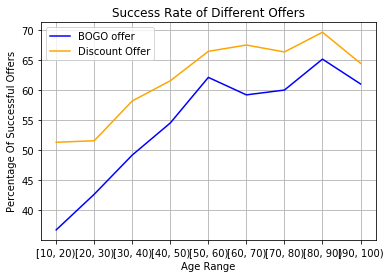

In [69]:
age_range = ['[10, 20)','[20, 30)','[30, 40)','[40, 50)','[50, 60)','[60, 70)','[70, 80)', '[80, 90)','[90, 100)']
plt.plot(age_range, perc_bogo[:9], color = "blue", label = "BOGO offer")
plt.plot(age_range, perc_disc[:9], color = "orange" , label = "Discount Offer")
plt.xlabel("Age Range")
plt.ylabel("Percentage Of Successful Offers")
plt.title("Success Rate of Different Offers")
plt.grid(True)
plt.legend()
plt.show()

From the above result, We can infer that customers are more likely to respond to a **Discount** offer, as compared to **BOGO** offer .Though the reward for a **BOGO** offer is high, the possible reason for the above trend could be the **difficulty level** which is high for a BOGO offer, thus out-numbered by Discount one .


### Success Rate Of Different Offer Mediums 

In [70]:
group_5 = dataframe_comp.groupby(["gender_dummy",'[10, 20)', '[20, 30)', '[30, 40)', '[40, 50)',
        '[50, 60)', '[60, 70)', '[70, 80)', '[80, 90)','[90, 100)', '[100, 110)']).sum()
group_6 = dataframe_view.groupby(["gender_dummy",'[10, 20)', '[20, 30)', '[30, 40)', '[40, 50)',
        '[50, 60)', '[60, 70)', '[70, 80)', '[80, 90)','[90, 100)', '[100, 110)']).sum()
group_5
group_6

income  \
gender_dummy [10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [60, 70) [70, 80) [80, 90) [90, 100) [100, 110)                
0            0        0        0        0        0        0        0        0        0         1             4733000.0   
                                                                                     1         0            50481000.0   
                                                                            1        0         0           151668000.0   
                                                                   1        0        0         0           285619000.0   
                                                          1        0        0        0         0           454793000.0   
                                                 1        0        0        0        0         0           539578000.0   
                                        1        0        0        0        0        0         0           242511000.0   
                               1        0        0        0        0        0        0         0           122831000.0   
                      1        0        0        0        0        0        0        0         0            93007000.0   
             1        0        0        0        0        0        0        0        0         0            10706000.0   
1            0        0        0        0        0        0        0        0        0         1              581000.0   
                                                                                     1         0            29411000.0   
                                                                            1        0         0           113352000.0   
                                                                   1        0        0         0           270859000.0   
                                                          1        0        0        0         0           471599000.0   
                                                 1        0        0        0        0         0           570737000.0   
                                        1        0        0        0        0        0         0           379896000.0   
                               1        0        0        0        0        0        0         0           241716000.0   
                      1        0        0        0        0        0        0        0         0           219433000.0   
             1        0        0        0        0        0        0        0        0         0            35910000.0   

                                                                                                           difficulty  \
gender_dummy [10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [60, 70) [70, 80) [80, 90) [90, 100) [100, 110)               
0            0        0        0        0        0        0        0        0        0         1                  526   
                                                                                     1         0                 5238   
                                                                            1        0         0                15591   
                                                                   1        0        0         0                28752   
                                                          1        0        0        0         0                46114   
                                                 1        0        0        0        0         0                54458   
                                        1        0        0        0        0        0         0                28622   
                               1        0        0        0        0        0        0         0                17143   
                      1        0        0        0        0        0        0        0         0                13642   
             1        0        0        0        0        0        0        0        0         0

In [71]:
web_comp_female = group_5["web"].values[:10]
social_comp_female = group_5["social"].values[:10]
mobile_comp_female = group_5["mobile"].values[:10]

web_view_female = group_6["web"].values[:10]
social_view_female = group_6["social"].values[:10]
mobile_view_female = group_6["mobile"].values[:10]

web_comp_male = group_5["web"].values[10:]
social_comp_male = group_5["social"].values[10:]
mobile_comp_male = group_5["mobile"].values[10:]

web_view_male = group_6["web"].values[10:]
social_view_male = group_6["social"].values[10:]
mobile_view_male = group_6["mobile"].values[10:]

perc_web_female = (web_comp_female / web_view_female)*100
perc_social_female = (social_comp_female /  social_view_female)*100
perc_mobile_female = (mobile_comp_female / mobile_view_female)*100

perc_web_male = (web_comp_male / web_view_male) * 100
perc_social_male = (social_comp_male /  social_view_male)*100
perc_mobile_male = (mobile_comp_male / mobile_view_male)*100

perc_web_male

array([ 100.        ,   46.34146341,   51.97026022,   51.86194369,
         50.51528684,   51.60633813,   46.51755935,   42.94294294,
         37.65077542,   37.21340388])

#### Analyzing female customers

In [72]:
# Create dataframe for female customers analysis
d = {"Age Range" : ['[10, 20)', '[20, 30)', '[30, 40)', '[40, 50)','[50, 60)', '[60, 70)', '[70, 80)', '[80, 90)','[90, 100)', '[100, 110)'],
     "Successful Mobile Offer": perc_mobile_female[::-1], "Successful Social Offer" : perc_social_female[::-1], "Successful Web Offer" : perc_web_female[::-1]}
female_medium_con_rate = pd.DataFrame(data = d)
female_medium_con_rate

,Age Range,Successful Mobile Offer,Successful Social Offer,Successful Web Offer
0,"[10, 20)",41.304348,46.721311,44.444444
1,"[20, 30)",51.477833,55.860806,56.775539
2,"[30, 40)",53.573213,59.066148,59.184813
3,"[40, 50)",53.813940,57.462020,59.229209
4,"[50, 60)",57.063492,61.584065,63.529621
5,"[60, 70)",56.956845,61.551293,63.382353
6,"[70, 80)",53.558612,58.151184,59.853529
7,"[80, 90)",57.987839,63.733553,64.846202
8,"[90, 100)",55.753647,60.679612,61.380597
9,"[100, 110)",57.894737,63.888889,62.264151


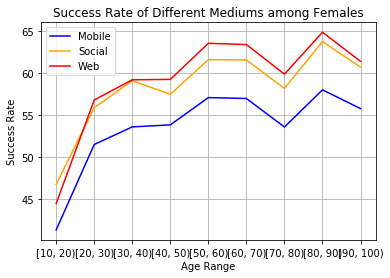

In [73]:
age_range = ['[10, 20)','[20, 30)','[30, 40)','[40, 50)','[50, 60)','[60, 70)','[70, 80)', '[80, 90)','[90, 100)']
plt.plot(age_range, perc_mobile_female[1:][::-1], color = "blue", label = "Mobile")
plt.plot(age_range, perc_social_female[1:][::-1], color = "orange" , label = "Social")
plt.plot(age_range, perc_web_female[1:][::-1], color = "red" , label = "Web")
plt.xlabel("Age Range")
plt.ylabel("Success Rate")
plt.title("Success Rate of Different Mediums among Females")
plt.grid(True)
plt.legend()
plt.show()

#### Analyzing male customers

In [74]:
# Create a dataframe for male customers analysis
d = {"Age Range" : ['[10, 20)', '[20, 30)', '[30, 40)', '[40, 50)','[50, 60)', '[60, 70)', '[70, 80)', '[80, 90)','[90, 100)'],
     "Successful Mobile Offer": perc_mobile_male[::-1][:9], "Successful Social Offer" : perc_social_male[::-1][:9], "Successful Web Offer" : perc_web_male[::-1][:9]}
male_medium_con_rate = pd.DataFrame(data = d)
male_medium_con_rate

,Age Range,Successful Mobile Offer,Successful Social Offer,Successful Web Offer
0,"[10, 20)",31.770045,34.955752,37.213404
1,"[20, 30)",33.428128,35.978428,37.650775
2,"[30, 40)",38.651356,42.435424,42.942943
3,"[40, 50)",42.185339,46.105919,46.517559
4,"[50, 60)",46.377000,50.406021,51.606338
5,"[60, 70)",45.319375,48.438553,50.515287
6,"[70, 80)",46.442151,50.369155,51.861944
7,"[80, 90)",46.942801,52.431907,51.970260
8,"[90, 100)",40.831296,44.244604,46.341463


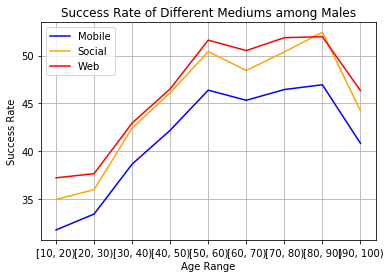

In [75]:
# Plot
age_range = ['[10, 20)','[20, 30)','[30, 40)','[40, 50)','[50, 60)','[60, 70)','[70, 80)', '[80, 90)','[90, 100)']
plt.plot(age_range, perc_mobile_male[1:][::-1], color = "blue", label = "Mobile")
plt.plot(age_range, perc_social_male[1:][::-1], color = "orange" , label = "Social")
plt.plot(age_range, perc_web_male[1:][::-1], color = "red" , label = "Web")
plt.xlabel("Age Range")
plt.ylabel("Success Rate")
plt.title("Success Rate of Different Mediums among Males")
plt.grid(True)
plt.legend()
plt.show()

These results suggest that both Male and Female Customers responds more to Online Channels of Offers that is **Web** and **Social** channels.

Also the offer success rate of **Female** customers is more across all the **Age Ranges** as compared to Male customers, thus the company should present with more offers to female customers for better conversion rate.

### Analysis Of Transaction amount

Aim is to analyse the expectation Starbucks should have from a customer with certain demographic features

In [76]:
# Quick recap of the data
dataframe_transaction.head()

,customer_id,income,gender_dummy,2013,2014,2015,2016,2017,2018,days_time,...,"[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)","[100, 110)",amount
0,0610b486422d4921ae7d2bf64640c50b,112000.0,0,0,0,0,0,1,0,0.75,...,0,0,0,1,0,0,0,0,0,21.51
1,0610b486422d4921ae7d2bf64640c50b,112000.0,0,0,0,0,0,1,0,6.00,...,0,0,0,1,0,0,0,0,0,32.28
2,0610b486422d4921ae7d2bf64640c50b,112000.0,0,0,0,0,0,1,0,22.00,...,0,0,0,1,0,0,0,0,0,23.22
3,78afa995795e4d85b5d9ceeca43f5fef,100000.0,0,0,0,0,0,1,0,5.50,...,0,0,0,0,0,1,0,0,0,19.89
4,78afa995795e4d85b5d9ceeca43f5fef,100000.0,0,0,0,0,0,1,0,6.00,...,0,0,0,0,0,1,0,0,0,17.78


In [77]:
# Grouping the data into age_groups and gender_dummy
group_tran = dataframe_transaction.groupby(["gender_dummy",'[10, 20)', '[20, 30)', '[30, 40)', '[40, 50)','[50, 60)', '[60, 70)', '[70, 80)', '[80, 90)','[90, 100)','[100, 110)']).mean()
group_tran

income  \
gender_dummy [10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [60, 70) [70, 80) [80, 90) [90, 100) [100, 110)                 
0            0        0        0        0        0        0        0        0        0         1           69066.666667   
                                                                                     1         0           70272.163121   
                                                                            1        0         0           70835.977337   
                                                                   1        0        0         0           71947.271817   
                                                          1        0        0        0         0           71884.455856   
                                                 1        0        0        0        0         0           72780.747744   
                                        1        0        0        0        0        0         0           62436.586791   
                               1        0        0        0        0        0        0         0           53804.487805   
                      1        0        0        0        0        0        0        0         0           51724.004551   
             1        0        0        0        0        0        0        0        0         0           52518.518519   
1            0        0        0        0        0        0        0        0        0         1           80500.000000   
                                                                                     1         0           62107.336957   
                                                                            1        0         0           65237.776289   
                                                                   1        0        0         0           63169.335142   
                                                          1        0        0        0         0           61356.203589   
                                                 1        0        0        0        0         0           62885.727162   
                                        1        0        0        0        0        0         0           57185.551584   
                               1        0        0        0        0        0        0         0           52557.819053   
                      1        0        0        0        0        0        0        0         0           50797.414243   
             1        0        0        0        0        0        0        0        0         0           49527.479469   

                                                                                                               2013  \
gender_dummy [10, 20) [20, 30) [30, 40) [40, 50) [50, 60) [60, 70) [70, 80) [80, 90) [90, 100) [100, 110)             
0            0        0        0        0        0        0        0        0        0         1           0.000000   
                                                                                     1         0           0.011525   
                                                                            1        0         0           0.010765   
                                                                   1        0        0         0           0.020691   
                                                          1        0        0        0         0           0.017776   
                                                 1        0        0        0        0         0           0.010142   
                                        1        0        0        0        0        0         0           0.027323   
                               1        0        0        0        0        0        0         0           0.020683   
                      1        0        0        0        0        0        0        0         0           0.010011   
             1        0        0        0        0        0        0        0        0         0 

In [78]:
# Get the transaction amount of male and female customers
spend_female = group_tran["amount"][1:10].values
spend_male = group_tran["amount"][11:].values
spend_male

array([ 15.52533967,  14.92570998,  14.09612212,  13.40050201,
        13.72105453,  11.06519827,   8.84136908,   6.80103743,   7.09415035])

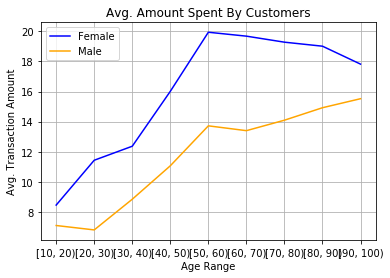

In [79]:
# Plot 
age_range = ['[10, 20)','[20, 30)','[30, 40)','[40, 50)','[50, 60)','[60, 70)','[70, 80)', '[80, 90)','[90, 100)']
plt.plot(age_range, spend_female[::-1], color = "blue", label = "Female")
plt.plot(age_range, spend_male[::-1], color = "orange" , label = "Male")
plt.xlabel("Age Range", fontsize = 10)
plt.ylabel("Avg. Transaction Amount", fontsize = 10)
plt.title("Avg. Amount Spent By Customers", fontsize = 12)
plt.grid(True)
plt.legend()
plt.show()

Clearly, we can see that avg. transaction amount a **female customer** spends is way higher than a male customer. And this gap further increase in the age range of [50-80] , which could be the target age range of Starbucks as discussed earlier.

## Conclusion

Overall, I found the project quite challenging, mainly due to the amount preprocessing required by the transcript.json dataset. I had started with 2 business problems :
1. What should be the target age_range of the customers to drive the maximum revenue.
2. Which offer to provide to a customer with particular features.
3. Can we determine a channel/medium through which an offer shuld be sent to make it a 
   successful one, given the demographic features of a customer.
   
I ended up analyzing one more aspect that is what should Starbucks expect from a customer, that is how much a customer will spend with certain demographic features.   

### Reflection:

#### Question 1 findings:

For this question, I combined the results of 2 separate analysis.From the analysis of 'conversion rate of an offer by age_range' and 'conversion rate of different offers', we can Statistically conclude that elderly customers would be dear to Starbucks and would try to capitalize on their behaviour.

Since, the turnout of the customers of the range [90,100] and [100,110] is quite low, thus starbucks should also look at the number of successful offers, thus can target the customers of age_range [40,60)

#### Question 2 findings:

For question 2, I considered the age group as most driving factor and divided the offer into its different types(bogo and discount). What can be concluded is that almost apart from customers of 'age range': [100,110) all the other age range customers found discount offer to be worth it .

One of the prime reason for this conclusion could be the difficulty, that is the amount to be spend to complete an offer is high for a bogo offer than discount one, thus customers responds more to a discount offer.

#### Question 3 findings:

For question 3, I could sum up that online platform that is social and web offers have better conversion rate than mobile offers. 

On an average, for all the age_ranges, there is a alomost 4% more chances of an offer to be successful , when used web or social as a channel. In particular, web proved to be the standout performer and thus should be used extensively.

When further analysed, we could see that for both male and female customers, it holds true that online channels perform better than mobile offers .

#### Question 4 findings:

As far as the expectation is concerned, I categorised the customer as Males and Females customers. What, I found that regardless of the age group, a female customer will spend more as compared to male customer. 

And for age ranging from [40,80], that is the combined age_range where maximum customers belong, the gap between the transaction amount of a male and a female customer is as high as 4 dollars. 
